In [19]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Load the Iris dataset
iris_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#iris_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
iris_data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'species']

iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Step 2: Check for missing values
print(iris_data.isnull().any())

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
species          False
dtype: bool


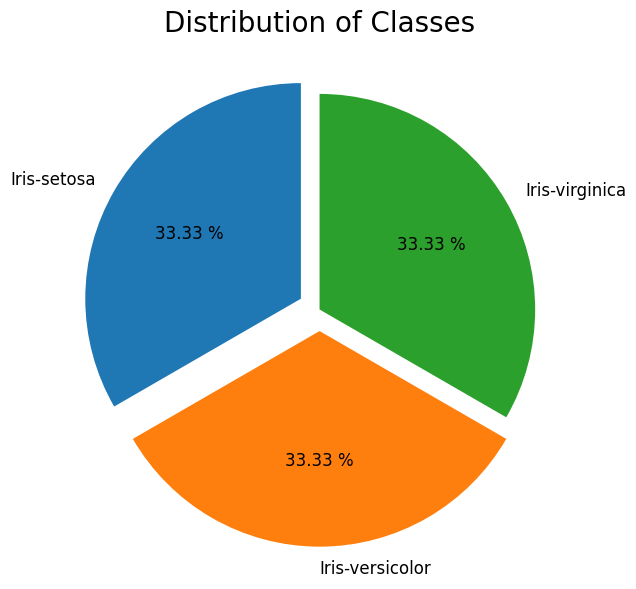

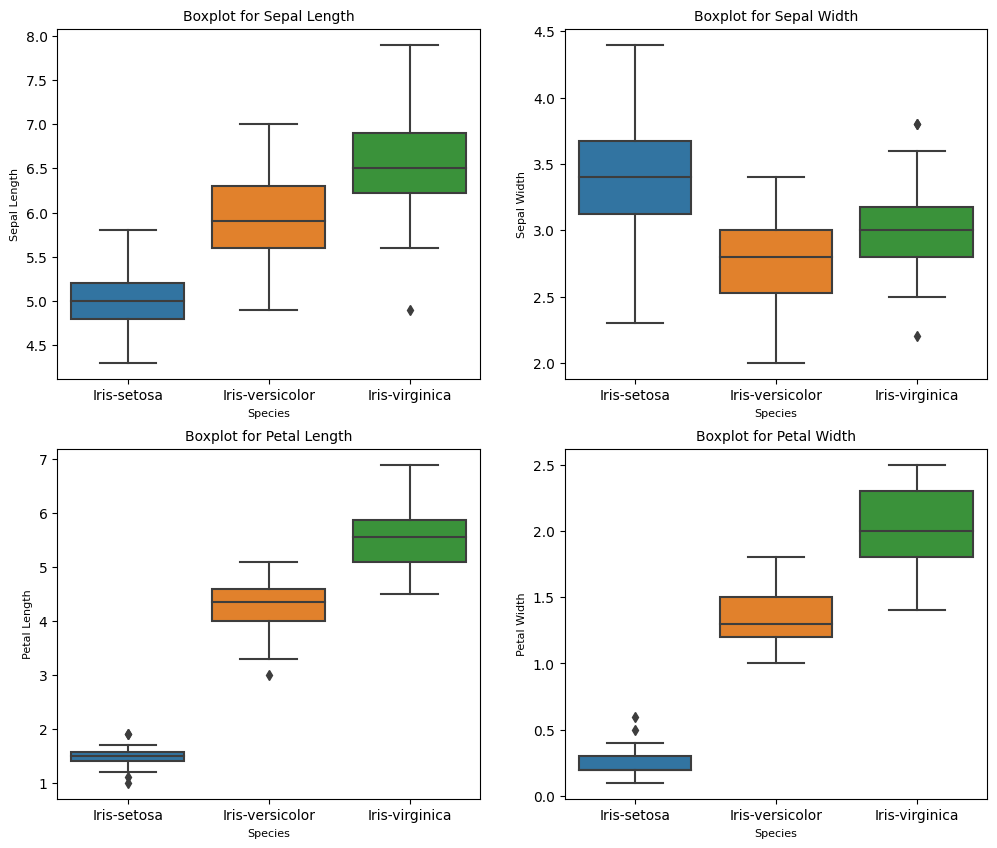

In [21]:
# Step 3: Data Exploration

iris_data.describe(include='all')

# Data Visualization

# Class Distribution Plot
count_list = [(iris_data.species == 'Iris-setosa').sum(), (iris_data.species == 'Iris-versicolor').sum(), 
              (iris_data.species == 'Iris-virginica').sum()]
label_list = list(iris_data['species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), 
        textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

# Check for outliers

plt.figure(figsize=(12, 10))

def create_boxplot(feature):
    sns.boxplot(data = iris_data, x = 'species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 10)
    plt.xlabel('Species', fontsize = 8)
    plt.ylabel(feature, fontsize = 8)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()


In [22]:
# Step 4: Data Pre-processing

# Extract features (X) and labels (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Encode the class labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [23]:
# Decision Trees (CART algorithm):

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the classifier
dt_report = classification_report(y_test, dt_predictions)
print("Decision Tree Classifier Report:")
print(dt_report)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
# Gradient Boosting (XGBoost):

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the classifier
xgb_report = classification_report(y_test, xgb_predictions)
print("XGBoost Classifier Report:")
print(xgb_report)


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

